# 蔡英文聲量分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Tsai_data = pd.read_csv("Tsai_April_info.csv")
Tsai_data.head()

,Unnamed: 0,Date,Push,Title,Author,Link,Comment_Count,Content,Push_Count,Boo_Count
0,0,4/01,52,[新聞] 新民調出爐！蔡英文、蘇貞昌、民進黨皆,flyer1998,/bbs/Gossiping/M.1554114974.A.D22.html,155,1.媒體來源:\n\n\n三立\n2.完整新聞標題:\n\n\n新民調出爐！蔡英文、蘇貞昌、...,79,21
1,1,4/01,25,[新聞] 共機挑釁 國民黨不敢譴責說「這句」,jacksonli,/bbs/Gossiping/M.1554115570.A.61B.html,60,共機挑釁 國民黨不敢譴責說「這句」\n三立新聞網 setn.com\n三立新聞網 setn....,33,7
2,2,4/01,8,[新聞] 國營事業新潮流系董座屢出包 仍前仆後繼,leftavoid,/bbs/Gossiping/M.1554115989.A.619.html,22,1.媒體來源:\n蘋果日報\n\n\n2.完整新聞標題:\n國營事業新潮流系董座屢出包 仍前...,13,5
3,3,4/01,爆,[新聞] 蔡英文：愚人節不開玩笑！跟國軍一起守護國土 一寸不讓,rickey1270,/bbs/Gossiping/M.1554116030.A.6C3.html,351,1.媒體來源:\n\n\n蘋果日報\n\n2.完整新聞標題:\n\n\n蔡英文：愚人節不開玩...,233,33
4,4,4/01,2,Re: [新聞] 新民調出爐！蔡英文、蘇貞昌、民進黨皆,ds13689,/bbs/Gossiping/M.1554116812.A.CA1.html,12,: 1.媒體來源:\n: ※ 例如蘋果日報、自由時報\n: 三立\n: 2.完整新聞標題:\...,4,2


## 1.以推文數除以總回文數畫曲線圖

In [20]:
#推文除以總回文數

comment_count_arr = np.array(Tsai_data["Comment_Count"])
push_count_arr = np.array(Tsai_data["Push_Count"])


divide_arr = push_count_arr/comment_count_arr
divide_ser = pd.Series(divide_arr)


#時間
date_ser = Tsai_data["Date"]


divide_ser.head()

/Users/shulilu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


0    0.509677
1    0.550000
2    0.590909
3    0.663818
4    0.333333
dtype: float64

In [95]:
#去除NaN

df_0 = pd.DataFrame()
df_0["Date"] = date_ser
df_0["Ratio"] = divide_ser
df = df_0.fillna(0)
df.head()

,Date,Ratio
0,4/01,0.509677
1,4/01,0.550000
2,4/01,0.590909
3,4/01,0.663818
4,4/01,0.333333


In [77]:
#試做4/01

seg_df = df[df["Date"] == ' 4/01']
ratio_ser = seg_df["Ratio"]
summary = sum(ratio_ser)
average = summary/len(ratio_ser)    

average

0.3559897541345059

In [83]:
#平均函數

def average_fun(date):
    """取得單日平均推：總回覆的平均"""
    seg_df = df[df["Date"] == date]
    ratio_ser = seg_df["Ratio"]
    summary = sum(ratio_ser)
    average = summary/(len(ratio_ser))
    
    return average

In [116]:
from collections import Counter
count = Counter(date_ser)
count

date_list = list(count.keys())
#len(date_list)

In [119]:
average_list = [ ]
for i in date_list:
    average_list.append(average_fun(i))
    
# average_list 
#len(average_list)

30

In [149]:
avg_df = pd.DataFrame()
avg_df["Date"] = date_list
avg_df["Average"] = average_list

avg_df

,Date,Average
0,4/01,0.355990
1,4/02,0.366947
2,4/03,0.396726
3,4/04,0.380750
4,4/05,0.349173
5,4/06,0.338798
6,4/07,0.348699
7,4/08,0.362542
8,4/09,0.350098
9,4/10,0.377374


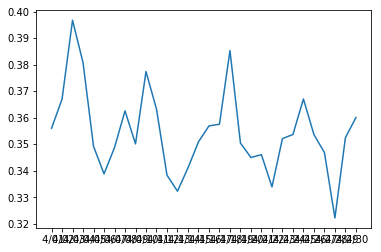

In [122]:
#高低峰圖

plt.plot(date_list , average_list)

## 2.判斷高低峰

### 2.1抓出高低峰

In [142]:
#判斷高低峰函數


def peakdetect(y_axis, x_axis = None, lookahead = 500, delta = 0):
    """判斷高低峰"""
    
    maxtab = []
    mintab = []
    dump = []   #Used to pop the first hit which always if false
       
    length = len(y_axis)
    if x_axis is None:
        x_axis = range(length)
    
    #needs to be a numpy array
    y_axis = np.asarray(y_axis)
    
    #maxima and minima candidates are temporarily stored in
    #mx and mn respectively
    mn, mx = np.Inf, -np.Inf
    
    #Only detect peak if there is 'lookahead' amount of points after it
    for index, (x, y) in enumerate(zip(x_axis[:-lookahead], y_axis[:-lookahead])):
        if y > mx:
            mx = y
            mxpos = x
        if y < mn:
            mn = y
            mnpos = x
        
        ####look for max####
        if y < mx-delta and mx != np.Inf:
            #Maxima peak candidate found
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].max() < mx:
                maxtab.append((mxpos, mx))
                dump.append(True)
                #set algorithm to only find minima now
                mx = np.Inf
                mn = np.Inf
        
        ####look for min####
        if y > mn+delta and mn != -np.Inf:
            #Minima peak candidate found 
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].min() > mn:
                mintab.append((mnpos, mn))
                dump.append(False)
                #set algorithm to only find maxima now
                mn = -np.Inf
                mx = -np.Inf
    
    
    #Remove the false hit on the first value of the y_axis
    try:
        if dump[0]:
            maxtab.pop(0)
            #print "pop max"
        else:
            mintab.pop(0)
            #print "pop min"
        del dump
    except IndexError:
        #no peaks were found, should the function return empty lists?
        pass
    
    return maxtab, mintab


In [144]:
#抓出高低峰

res = peakdetect(average_list, x_axis = None, lookahead = 1, delta = 0)
res_list = list(res)
res_list

[[(2, 0.3967263237341317),
  (7, 0.36254215593168915),
  (17, 0.3852932259721014),
  (24, 0.36704251175774)],
 [(5, 0.3387978759216445),
  (12, 0.33224766079657897),
  (19, 0.3449519451970293),
  (27, 0.322174420906848)]]

### 2.2高低峰DataFrame

In [164]:
#高峰

local_max = res_list[0]
date_list = [" 4/03" , " 4/07" , " 4/18" , " 4/25"]
average_list = [ ]
for i in range(4):
    average_list.append(local_max[i][1])
    
local_max_df = pd.DataFrame()
local_max_df["Date"] = date_list
local_max_df["Average"] = average_list

local_max_df

,Date,Average
0,4/03,0.396726
1,4/07,0.362542
2,4/18,0.385293
3,4/25,0.367043


In [242]:
#低峰

local_min = res_list[1]
date_list = [" 4/06" , " 4/13" , " 4/20" , " 4/28"]
average_list = [ ]
for i in range(4):
    average_list.append(local_min[i][1])
    
local_min_df = pd.DataFrame()
local_min_df["Date"] = date_list
local_min_df["Average"] = average_list

local_min_df

,Date,Average
0,4/06,0.338798
1,4/13,0.332248
2,4/20,0.344952
3,4/28,0.322174


## 3.分析高峰出現的文章

### 3.1抓出高峰文章

In [185]:
seg_date = local_max_df["Date"]
Tsai_data[Tsai_data["Date"] == seg_date[0]]

max_df = pd.DataFrame()
for i in range(4):
    max_df = pd.concat( [max_df , Tsai_data[Tsai_data["Date"] == seg_date[i]]] , axis = 0 , ignore_index = "True")
    
    
max_df.head()

,Unnamed: 0,Date,Push,Title,Author,Link,Comment_Count,Content,Push_Count,Boo_Count
0,114,4/03,NaN,Re: [新聞] 蔡英文：會和國軍一起奮鬥到底 國土一寸,o02852six,/bbs/Gossiping/M.1554221233.A.0E6.html,21,我們台灣蔡英文當局 有必要把話說的這個樣子嗎？\n\n面對大陸 難道我們不可以用一些比較和平...,6,10
1,115,4/03,NaN,[新聞] 賴清德：參與總統初選就希望走完程序,ArimuraChika,/bbs/Gossiping/M.1554222205.A.E00.html,21,1.媒體來源:\n\n聯合新聞網\n\n2.完整新聞標題:\n\n賴清德：參與總統初選就希望...,6,6
2,116,4/03,NaN,Re: [問卦] 有沒有館長要賣牛肉麵的八卦?,yoyoflag,/bbs/Gossiping/M.1554223629.A.C12.html,9,館長還是等總統選完再賣吧\n\n最近館長要跟賴清德直播了\n蔡英文可能會為了打賴清德 而派國...,1,3
3,117,4/03,NaN,[新聞] 轉知陳情被認定關說 邱太三辭去國安會諮,aaaaaaaaaaac,/bbs/Gossiping/M.1554223979.A.434.html,23,1.媒體來源:\n\n\n自由\n\n2.完整新聞標題:\n\n\n轉知陳情被認定關說 邱太...,7,9
4,118,4/03,5,Re: [問卦] 中共打過來 30歲以下年輕人會選擇,cayman2009,/bbs/Gossiping/M.1554226510.A.699.html,47,跟你說實話﹐免得你難過﹐當你犧牲的時候﹐\n林菲凡已經成了台灣省宣傳部長﹐陳違婷已經做了台灣...,16,12


### 3.2對高峰文章做LDA

In [196]:
import jieba 
from time import sleep
import re

In [194]:
max_content = list(max_df["Content"])
max_title = list(max_df["Title"])

In [197]:
#停用字詞1

prog = re.compile('[\s+\.\!\/_,$%^*(+\"\'-]+|[+——→！，。？：:；“”、~@#￥%……&*（）(\d+)「」『』《》【】│]+|[0-9]+|[a-z]', re.I)

#停用字詞2

stop_words = [ ]
with open('Stop_Words.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stop_words.append(data)
stop_words[0:5]

['$', '0', '1', '2', '3']

In [201]:
#切詞

jieba.load_userdict("term_2.txt")
clean_words = [ ]

for i in range(424):
    clean = prog.sub(' ', max_content[i])
    seg_words = jieba.cut(clean , cut_all = False)
    remainder_words = list(filter(lambda a:a not in stop_words and a != "\n" , seg_words))
    
    clean_words.append(remainder_words)
    
clean_words[0:5]    
len(clean_words)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/qx/7hg_r3x1563bd0s5rys142_00000gn/T/jieba.cache
Loading model cost 1.378 seconds.
Prefix dict has been built succesfully.


424

In [226]:
#看一下切詞結果

df = pd.DataFrame()
df["Title"] = max_title
df["Seg_Content"] = clean_words

df.head()

,Title,Seg_Content
0,Re: [新聞] 蔡英文：會和國軍一起奮鬥到底 國土一寸,"[台灣, 蔡英文, 當局, 必要, 話, 說, 樣子, 面對, 大陸, 難道, 比較, 和平..."
1,[新聞] 賴清德：參與總統初選就希望走完程序,"[ , , 媒體, 來源, , , 聯合, 新聞網, , , , 完整, 新聞,..."
2,Re: [問卦] 有沒有館長要賣牛肉麵的八卦?,"[館長, 總統, 選完, 賣, , 最近, 館長, 賴清德, 直播, , 蔡英文, 可能..."
3,[新聞] 轉知陳情被認定關說 邱太三辭去國安會諮,"[ , , 媒體, 來源, , , 自由, , , , 完整, 新聞, 標題, ..."
4,Re: [問卦] 中共打過來 30歲以下年輕人會選擇,"[說, 實話, ﹐, 免得, 難過, ﹐, 當你, 犧牲, ﹐, , 林菲凡, 經成, 台..."


In [227]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from pprint import pprint

In [228]:
# Create Dictionary
id2word = corpora.Dictionary(clean_words)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in clean_words]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, 
                                           random_state=100, update_every=1, chunksize=10,
                                           passes=10, alpha='symmetric', iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.010*"教授" + 0.006*"死刑" + 0.006*"憲法" + 0.006*"の" + 0.006*"朕" + 0.005*"王希哲" '
  '+ 0.005*"に" + 0.004*"自稱" + 0.004*"た" + 0.004*"る"'),
 (1,
  '0.011*"草案" + 0.007*"消費者" + 0.007*"七天" + 0.007*"運輸" + 0.006*"客戶" + '
  '0.005*"提供" + 0.004*"罷工" + 0.004*"租賃" + 0.004*"交通部" + 0.004*"災害"'),
 (2,
  '0.021*"民進黨" + 0.015*"初選" + 0.013*"賴清德" + 0.012*"會" + 0.011*"蔡英文" + '
  '0.010*"說" + 0.007*"長" + 0.007*"併" + 0.007*"吳祥輝" + 0.007*"民主"'),
 (3,
  '0.611*" " + 0.012*"台灣" + 0.009*"─" + 0.007*"蔡英文" + 0.005*"總統" + 0.004*"說" + '
  '0.003*"新聞" + 0.003*"記者" + 0.003*"美國" + 0.003*"年"'),
 (4,
  '0.021*"郭台銘" + 0.013*"郭文貴" + 0.010*"韓國瑜" + 0.009*"朱立倫" + 0.007*"長" + '
  '0.007*"媽祖" + 0.006*"國民黨" + 0.006*"苗栗" + 0.005*"柯文哲" + 0.005*"改革"')]


In [ ]:
!pip install pyldavis
import gensim
from gensim import models
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [230]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/Users/shulilu/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.394574 -0.082889       1        1  76.974380
2      0.016020  0.287883       2        1  14.519196
4     -0.129734 -0.065353       3        1   4.157996
0     -0.141848 -0.071788       4        1   2.231410
1     -0.139011 -0.067853       5        1   2.117017, topic_info=      Category           Freq Term          Total  loglift  logprob
term                                                               
0      Default  109741.000000       109741.000000  30.0000  30.0000
167    Default     867.000000  民進黨     867.000000  29.0000  29.0000
80     Default     602.000000   初選     602.000000  28.0000  28.0000
45     Default    1590.000000  蔡英文    1590.000000  27.0000  27.0000
7165   Default     331.000000  郭台銘     331.000000  26.0000  26.0000
576    Default     714.000000    會     714.000000  25.0000  25.0000
48     Default    1056.000000    說    1056.000000  24.0000  24.0000
206    Default     506.000000  賴清德     506.000000  23.0000  23.0000
214    Default     584.000000    長     584.000000  22.0000  22.0000
219    Default     215.000000  韓國瑜     215.000000  21.0000  21.0000
1570   Default     328.000000  國民黨     328.000000  20.0000  20.0000
165    Default     469.000000   民主     469.000000  19.0000  19.0000
802    Default     189.000000  柯文哲     189.000000  18.0000  18.0000
10     Default     314.000000   今天     314.000000  17.0000  17.0000
2738   Default     239.000000    併     239.000000  16.0000  16.0000
11610  Default     231.000000  吳祥輝     231.000000  15.0000  15.0000
886    Default     501.000000   支持     501.000000  14.0000  14.0000
731    Default     340.000000    沒     340.000000  13.0000  13.0000
2      Default     257.000000   一定     257.000000  12.0000  12.0000
3468   Default     319.000000   民調     319.000000  11.0000  11.0000
17294  Default     123.000000  郭文貴     123.000000  10.0000  10.0000
73     Default     283.000000    做     283.000000   9.0000   9.0000
5122   Default    1555.000000    ─    1555.000000   8.0000   8.0000
660    Default     244.000000   不能     244.000000   7.0000   7.0000
228    Default     284.000000   可能     284.000000   6.0000   6.0000
34     Default     290.000000    更     290.000000   5.0000   5.0000
30     Default     211.000000   應該     211.000000   4.0000   4.0000
2747   Default     169.000000    吞     169.000000   3.0000   3.0000
47     Default     229.000000    話     229.000000   2.0000   2.0000
848    Default     185.000000    反     185.000000   1.0000   1.0000
...        ...            ...  ...            ...      ...      ...
4698    Topic5      15.174151  管轄區      16.048639   3.7991  -5.7862
2137    Topic5      13.128965   銀行      13.946108   3.7948  -5.9310
19525   Topic5      14.553634   危及      15.485540   3.7931  -5.8279
5861    Topic5      11.539989   司機      12.325991   3.7893  -6.0600
16982   Topic5      14.605680   旺旺      15.602684   3.7891  -5.8244
4177    Topic5      10.537387   案例      11.313456   3.7841  -6.1508
8366    Topic5      10.325303   兩項      11.104507   3.7824  -6.1712
2778    Topic5      16.743563    機      18.010527   3.7822  -5.6878
17842   Topic5       9.024080   車輛       9.814188   3.7712  -6.3059
19513   Topic5      10.908302   乘客      11.910723   3.7672  -6.1162
17800   Topic5       8.510892   演練       9.307100   3.7657  -6.3644
16449   Topic5       8.240541   防災       9.064325   3.7599  -6.3967
2364    Topic5      11.340126   海外      12.494041   3.7583  -6.0774
19535   Topic5       9.770219   客車      10.769761   3.7578  -6.2264
19530   Topic5       9.770219   外資      10.769761   3.7578  -6.2264
19527   Topic5       9.770219   叫車      10.769761   3.7578  -6.2264
19522   Topic5       9.770219  創新帶      10.769761   3.7578  -6.2264
2402    Topic5       7.457476   訓練       8.222483   3.7575  -6.4966
11631   Topic5       7.514050   允許       8.288813   3.7570  -6.4890
19705   Topic5      21.192488   罷工      23.

## 4.分析低峰出現的文章

### 4.1抓出低峰文章

In [250]:
seg_date_0 = local_min_df["Date"]
Tsai_data[Tsai_data["Date"] == seg_date_0[0]]

min_df = pd.DataFrame()
for i in range(4):
    min_df = pd.concat( [min_df , Tsai_data[Tsai_data["Date"] == seg_date_0[i]]] , axis = 0 , ignore_index = "True")
    
    
min_df.head()
len(min_df)

511

### 4.2對低峰文章做LDA

In [248]:
min_content = list(min_df["Content"])
min_title = list(min_df["Title"])

In [252]:
#切詞

jieba.load_userdict("term_2.txt")
min_clean_words = [ ]

for i in range(511):
    clean = prog.sub(' ', min_content[i])
    seg_words = jieba.cut(clean , cut_all = False)
    remainder_words = list(filter(lambda a:a not in stop_words and a != "\n" , seg_words))
    
    min_clean_words.append(remainder_words)
    
min_clean_words[0:5]    
len(min_clean_words)

511

In [257]:
#看一下切詞結果

df = pd.DataFrame()
df["Title"] = min_title
df["Seg_Content"] = min_clean_words

df.head()

,Title,Seg_Content
0,Re: [新聞] 蔡英文：月收3萬或一家年收123萬以下 考,"[ , , 蔡英文, , 月, 收, , 萬, 一家, 年收, , 萬, 以下, ..."
1,[新聞] 北韓有意對台潛艦國造參一腳 推銷自製絕,"[上報, , 北韓, 有意, 對台, 潛艦, 國造, 參一腳, , 推銷, 製, 絕, ..."
2,Re: [新聞] 民問「台獨有什麼好處？」 蔡英文：台灣,"[ , , , 分水, 嶺, , , , , 前, , , , 台灣, 一..."
3,[新聞] 民問「台獨有什麼好處？」 蔡英文：台灣,"[民問, , 台獨, 有什麼, 處, , , 蔡英文, , 台灣, 哪有, 獨立, ..."
4,[臉書] 吳祥輝,"[臉書卦點, 說明, , , 知名, 柯黑, , 拒絕, 聯考, 小子, 吳祥輝, ..."


In [259]:
# Create Dictionary
id2word = corpora.Dictionary(min_clean_words)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in clean_words]

# Build LDA model
min_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, 
                                           random_state=100, update_every=1, chunksize=10,
                                           passes=10, alpha='symmetric', iterations=100,
                                           per_word_topics=True)

pprint(min_lda_model.print_topics())

[(0,
  '0.027*"軍法" + 0.024*"法官" + 0.020*"軍隊" + 0.020*"收回" + 0.019*"太監" + 0.015*"韓市" '
  '+ 0.015*"穿" + 0.013*"西裝" + 0.013*"司法" + 0.011*"兵"'),
 (1,
  '0.040*"遊行" + 0.016*"反核" + 0.015*"廢核" + 0.013*"非核" + 0.011*"發電" + 0.010*"家園" '
  '+ 0.009*"能源" + 0.007*"核電" + 0.006*"做事" + 0.005*"解決"'),
 (2,
  '0.109*"─" + 0.024*"民調" + 0.014*"╴" + 0.006*"蔡正元" + 0.006*"板" + 0.006*"陳水扁" '
  '+ 0.006*"制服" + 0.005*"辯論" + 0.005*"]" + 0.005*"["'),
 (3,
  '0.572*" " + 0.008*"蔡英文" + 0.008*"說" + 0.007*"台灣" + 0.006*"總統" + 0.004*"會" + '
  '0.004*"長" + 0.003*"民進黨" + 0.003*"韓國瑜" + 0.003*"新聞"'),
 (4,
  '0.006*"公投" + 0.006*"買" + 0.005*"我國" + 0.005*"研發" + 0.005*"上街" + 0.005*"很多" '
  '+ 0.005*"戰略" + 0.005*"能力" + 0.005*"戰爭" + 0.004*"技術"')]


In [260]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(min_lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.425846  0.016343       1        1  83.549339
4     -0.081440 -0.280214       2        1   8.884861
2     -0.108026  0.154115       3        1   3.766667
1     -0.126749  0.064218       4        1   2.112480
0     -0.109632  0.045538       5        1   1.686657, topic_info=      Category           Freq  Term          Total  loglift  logprob
term                                                                
0      Default  242037.000000        242037.000000  30.0000  30.0000
7914   Default    2088.000000     ─    2088.000000  29.0000  29.0000
1309   Default     556.000000    民調     556.000000  28.0000  28.0000
10582  Default     429.000000    遊行     429.000000  27.0000  27.0000
1221   Default     709.000000    參加     709.000000  26.0000  26.0000
991    Default     586.000000     買     586.000000  25.0000  25.0000
16039  Default     233.000000    軍法     233.000000  24.0000  24.0000
462    Default     675.000000   國民黨     675.000000  23.0000  23.0000
8102   Default     266.000000     ╴     266.000000  22.0000  22.0000
121    Default     209.000000    法官     209.000000  21.0000  21.0000
57     Default     635.000000    問題     635.000000  20.0000  20.0000
85     Default     436.000000    很多     436.000000  19.0000  19.0000
569    Default     485.000000    發展     485.000000  18.0000  18.0000
1401   Default     324.000000    高雄     324.000000  17.0000  17.0000
2521   Default     272.000000    武器     272.000000  16.0000  16.0000
4847   Default     181.000000    收回     181.000000  15.0000  15.0000
3938   Default     177.000000    軍隊     177.000000  14.0000  14.0000
977    Default     347.000000    能力     347.000000  13.0000  13.0000
1398   Default     169.000000    韓市     169.000000  12.0000  12.0000
14629  Default     164.000000    太監     164.000000  11.0000  11.0000
20469  Default     173.000000    反核     173.000000  10.0000  10.0000
20257  Default     159.000000    廢核     159.000000   9.0000   9.0000
454    Default     317.000000  中華民國     317.000000   8.0000   8.0000
504    Default     258.000000    公投     258.000000   7.0000   7.0000
132    Default     387.000000    知道     387.000000   6.0000   6.0000
2801   Default     240.000000    我國     240.000000   5.0000   5.0000
369    Default     195.000000    立委     195.000000   4.0000   4.0000
20270  Default     147.000000    非核     147.000000   3.0000   3.0000
363    Default     232.000000    研發     232.000000   2.0000   2.0000
152    Default    3332.000000   蔡英文    3332.000000   1.0000   1.0000
...        ...            ...   ...            ...      ...      ...
16532   Topic5      49.231030    過兵      50.287605   4.0612  -5.1559
16701   Topic5      34.861748    沒當      35.678005   4.0593  -5.5010
16026   Topic5      30.395294    姊妹      31.185654   4.0568  -5.6381
10890   Topic5      34.531494    審判      35.485256   4.0552  -5.5106
16035   Topic5      27.615253    漂亮      28.471542   4.0519  -5.7341
16041   Topic5      25.930061    靈魂      26.736765   4.0518  -5.7970
16027   Topic5      22.946436    弟兄      23.721798   4.0492  -5.9193
16964   Topic5      21.292475    法庭      22.065048   4.0468  -5.9941
5946    Topic5      23.423340   司法院      24.277718   4.0466  -5.8987
3938    Topic5     171.042770    軍隊     177.308380   4.0464  -3.9105
16486   Topic5      26.260004    統帥      27.303888   4.0434  -5.7844
6419    Topic5      20.583586     卦      21.409946   4.0431  -6.0279
6489    Topic5      20.572155   點說明      21.400763   4.0429  -6.0285
9754    Topic5      20.122761    海空      20.983692   4.0405  -6.0506
7283    Topic5      18.400782   國軍的      19.200447   4.0399  -6.1400
16023   Topic5      18.333067    享有      19.141962   4.0392  -6.1437
12728   Topic5      20.270361    案件      21.183258   4.0384  -6.0433
16028   Topic5      17.458715    待命      18.284437   4.0362  -6.1926
122     Topic5      16.772112   法官法      17.578421   4.0355 